In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
#reading the data
df = pd.read_csv('../../../Data/Yield.csv',parse_dates=True,index_col='T')
df.index.name='T'
df.head()

,1Y,2Y,3Y,4Y,5Y,7Y,10Y,30Y
T,,,,,,,,
2001-01-02,4.692,4.5650,4.6550,4.7550,4.870,5.102,5.345,5.742
2001-01-03,4.619,4.5715,4.6550,4.7600,4.870,5.089,5.306,5.716
2001-01-04,4.526,4.5350,4.6650,4.7725,4.885,5.103,5.324,5.734
2001-01-05,4.458,4.4588,4.5888,4.7138,4.830,5.046,5.278,5.703
2001-01-08,4.451,4.4738,4.5850,4.7050,4.830,5.050,5.264,5.694


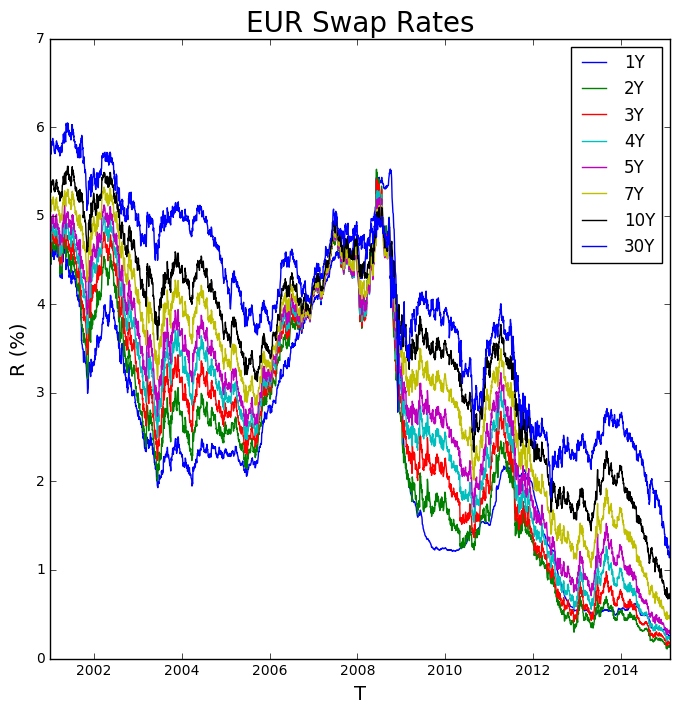

In [4]:
#reading Pandas object and plot the result
fig = plt.figure(figsize=(8,8))
for c in df.columns:
    plt.plot(df.index,df[c],label=c)
plt.legend()
plt.xlabel('T',fontsize=14)
plt.ylabel('R (%)',fontsize=14)
plt.title('EUR Swap Rates',fontsize=20);
    

In [5]:
#calculate the change in interest rates (daily)
df = df.diff()
df.dropna(axis=0,how='any',inplace=True)

In [6]:
#create array
dr = df.as_matrix()

In [7]:
#center the data
M = dr.mean(axis=0)
dr = dr - M

In [11]:
#covariance matrix
C = np.cov(dr,rowvar=0)
pd.DataFrame(C)

,0,1,2,3,4,5,6,7
0,0.000524,0.000291,0.000276,0.000234,0.000202,0.000172,0.000133,0.000040
1,0.000291,0.001539,0.001613,0.001573,0.001547,0.001395,0.001228,0.001056
2,0.000276,0.001613,0.001817,0.001758,0.001748,0.001603,0.001438,0.001262
3,0.000234,0.001573,0.001758,0.001840,0.001846,0.001718,0.001574,0.001421
4,0.000202,0.001547,0.001748,0.001846,0.001908,0.001793,0.001666,0.001537
5,0.000172,0.001395,0.001603,0.001718,0.001793,0.001786,0.001697,0.001622
6,0.000133,0.001228,0.001438,0.001574,0.001666,0.001697,0.001727,0.001639
7,0.000040,0.001056,0.001262,0.001421,0.001537,0.001622,0.001639,0.001975


In [15]:
#eigenvectors / values
L, V = np.linalg.eig(C)
#sort the eigenvalues
idx = L.argsort()[::-1]
L = L[idx]
V = V[:,idx]
pd.DataFrame(V)

,0,1,2,3,4,5,6,7
0,-0.047583,0.327653,-0.937811,-0.050601,0.084557,0.029044,-0.008988,-0.015995
1,-0.336599,0.430373,0.094095,0.388313,-0.367776,-0.631234,0.069461,-0.057434
2,-0.380193,0.359777,0.134763,0.239670,-0.240048,0.766068,0.045446,-0.062139
3,-0.396806,0.186069,0.121689,-0.094121,0.436347,-0.062377,-0.466193,0.610435
4,-0.407306,0.065418,0.110062,-0.222044,0.496641,-0.084325,-0.016615,-0.717193
5,-0.392520,-0.136163,-0.021722,-0.305549,0.040957,-0.040032,0.793813,0.316443
6,-0.370448,-0.304509,-0.109448,-0.510336,-0.591103,-0.030733,-0.376722,-0.073173
7,-0.353882,-0.654076,-0.232645,0.614203,0.108795,0.017048,-0.057950,-0.009869


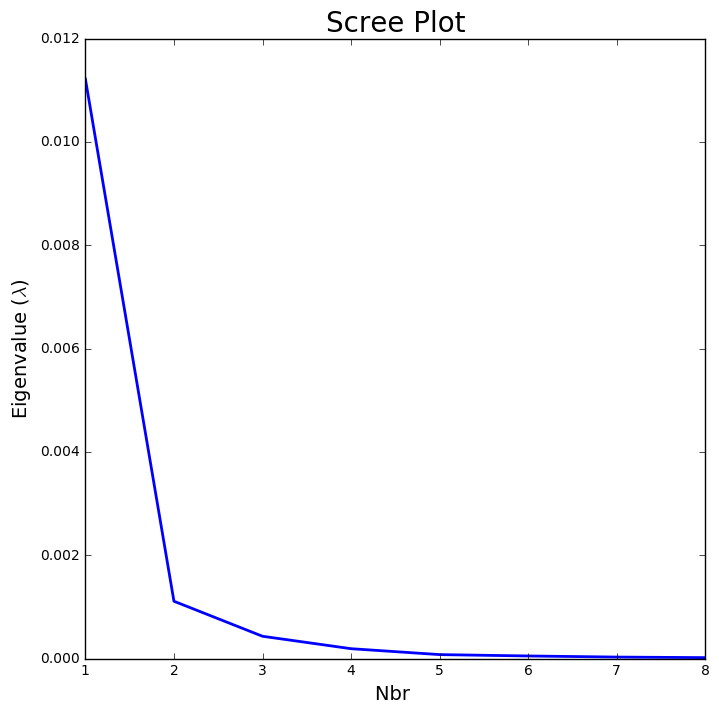

In [12]:
#scree plot
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(0,len(L))+1,L,linewidth=2)
plt.xlabel('Nbr ',fontsize=14)
plt.ylabel('Eigenvalue ($\lambda$)',fontsize=14)
plt.title('Scree Plot',fontsize=20)

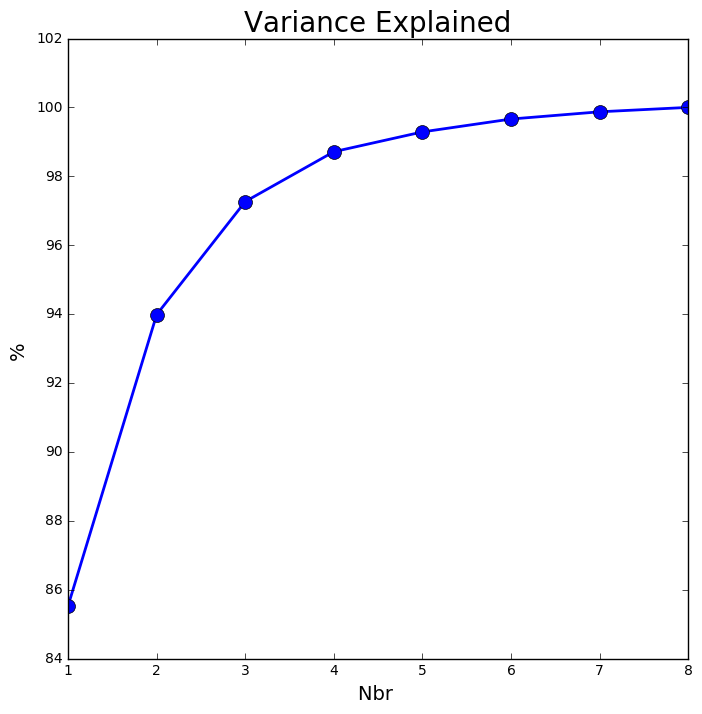

In [13]:
#Variance
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(0,len(L))+1,100*L.cumsum()/L.sum(),marker='o',color='blue',linewidth=2,markersize=10)
plt.xlabel('Nbr ',fontsize=14)
plt.ylabel('% ',fontsize=14)
plt.title('Variance Explained',fontsize=20)

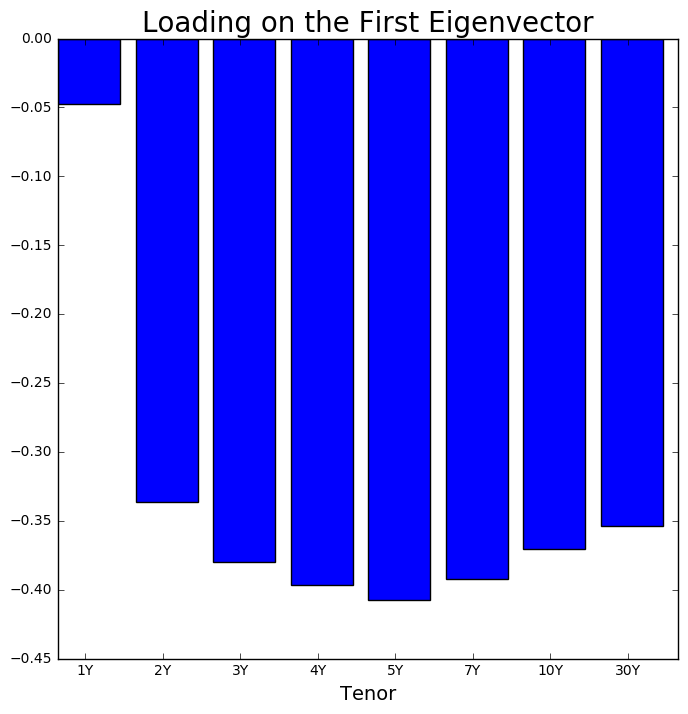

In [14]:
#First Eigenvector
fig = plt.figure(figsize=(8,8))
index =np.arange(0,len(df.columns),1)
plt.bar(index,V[:,0])
bar_width = 0.35
plt.xticks(index + bar_width, df.columns)
plt.xlabel('Tenor',fontsize=14)
plt.ylabel('',fontsize=14)
plt.title('Loading on the First Eigenvector',fontsize=20)

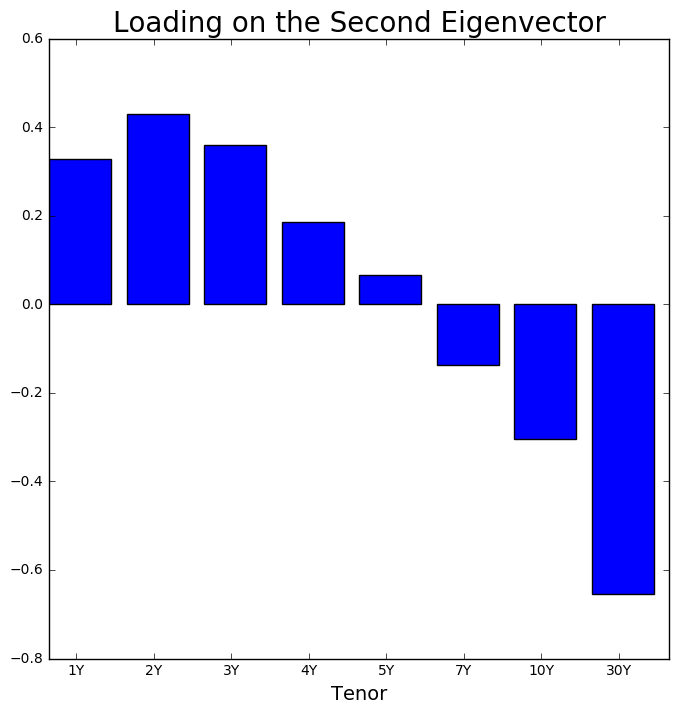

In [15]:
#Second Eigenvector
fig = plt.figure(figsize=(8,8))
index =np.arange(0,len(df.columns),1)
plt.bar(index,V[:,1])
bar_width = 0.35
plt.xticks(index + bar_width, df.columns)
plt.xlabel('Tenor',fontsize=14)
plt.ylabel('',fontsize=14)
plt.title('Loading on the Second Eigenvector',fontsize=20)


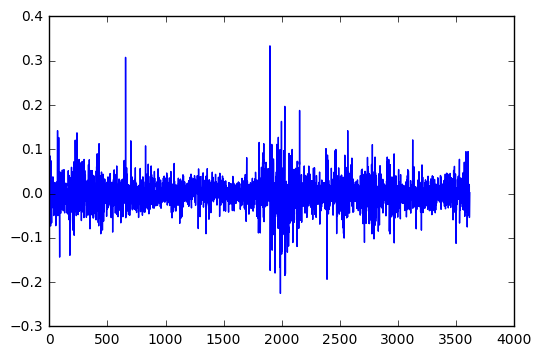

In [19]:
Z=np.dot(dr,V[:,1])
plt.plot(Z)

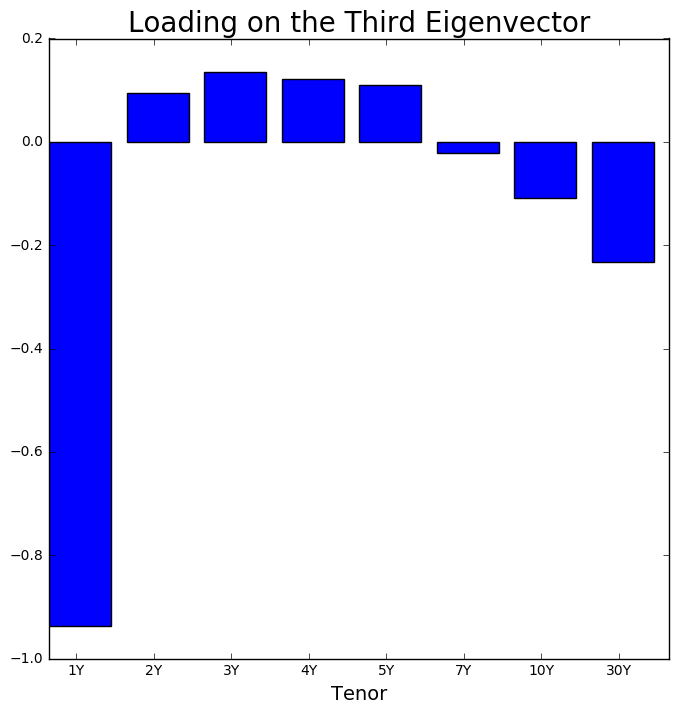

In [16]:
#Second Eigenvector
fig = plt.figure(figsize=(8,8))
index =np.arange(0,len(df.columns),1)
plt.bar(index,V[:,2])
bar_width = 0.35
plt.xticks(index + bar_width, df.columns)
plt.xlabel('Tenor',fontsize=14)
plt.ylabel('',fontsize=14)
plt.title('Loading on the Third Eigenvector',fontsize=20)
